In [2]:
#impoet dependencies

from tensorflow.keras.models import Sequential # Initalize ANN
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
from google.colab import files
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


In [7]:
df = pd.read_csv('AirPassengers.csv')
df = df['#Passengers']
df = np.array(df).reshape(-1,1)
df

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

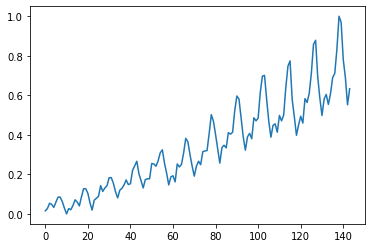

In [50]:
# Plot the data

plt.plot(df)

In [51]:
import seaborn as sns

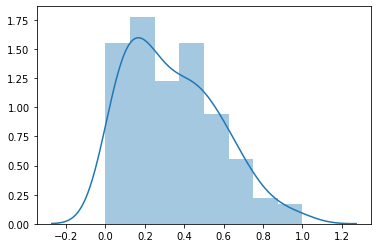

In [52]:
sns.distplot(df)

In [53]:
# Scale the value

sc = MinMaxScaler()
df = sc.fit_transform(df)
df.max()

1.0

In [54]:
train_size = 100
test_size = 44

In [55]:
train = df[0:train_size, :]
train.shape

(100, 1)

In [56]:
test = df[train_size:144, :]
test.shape

(44, 1)

In [57]:
### Building training and testing data

def get_data(df):
  X, y = [], []
  for i in range(len(df)-1-1):
    a = df[i:(i+1), 0] 
    X.append(a)
    y.append(df[i+1, 0])
  return np.array(X), np.array(y)

In [58]:
X_train, y_train = get_data(train)

In [59]:
X_train.shape

(98, 1)

In [60]:
y_train

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
       0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ,
       0.02702703, 0.02123552, 0.04247104, 0.07142857, 0.05984556,
       0.04054054, 0.08687259, 0.12741313, 0.12741313, 0.1042471 ,
       0.05598456, 0.01930502, 0.06949807, 0.07915058, 0.08880309,
       0.14285714, 0.11389961, 0.13127413, 0.14285714, 0.18339768,
       0.18339768, 0.15444015, 0.11196911, 0.08108108, 0.11969112,
       0.12934363, 0.14671815, 0.17181467, 0.14864865, 0.15250965,
       0.22007722, 0.24324324, 0.26640927, 0.2027027 , 0.16795367,
       0.13127413, 0.17374517, 0.17760618, 0.17760618, 0.25482625,
       0.25289575, 0.24131274, 0.26833977, 0.30888031, 0.32432432,
       0.25675676, 0.20656371, 0.14671815, 0.18725869, 0.19305019,
       0.16216216, 0.25289575, 0.23745174, 0.25096525, 0.30888031,
       0.38223938, 0.36486486, 0.2992278 , 0.24131274, 0.19111969,
       0.24131274, 0.26640927, 0.24903475, 0.31467181, 0.31853

In [61]:
X_test, y_test = get_data(test)

In [62]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [63]:
model = Sequential()
model.add(LSTM(4, input_shape = (1,1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0534
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0468
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0437
Epoch 5/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0408
Epoch 6/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0379
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0353
Epoch 8/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0329
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 10/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0284
Epoch 11/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 12/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0246
Epoch 13/50
4/4 [==============================] - 0s 1ms/step - loss: 0.

In [66]:
y_pred = model.predict(X_test)

In [67]:
y_pred = sc.inverse_transform(y_pred)

In [68]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = sc.inverse_transform(y_test)

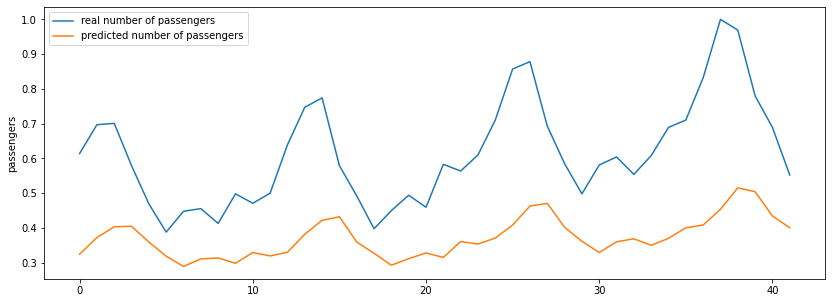

In [69]:
plt.figure(figsize = (14, 5))
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.ylabel('passengers')
plt.legend()
plt.show()